# Redes Neuronales Estadísticamente Informadas

![uami](./figuras/uami.png)

**Maestría en Matemáticas Aplicadas**

Alan Badillo Salas (cbi2242800355@xanum.uam.mx)

> Taller de Modelado II
> 
> Parte II (2137080)
> 
> **Trabajo Final**
> 
> *Trimestre: 25-P*
>
> Profesor: Dr. Joaquín Delgado Fernández

# Introducción

La motivación sobre este tema es brindarle a las redes neuronales información estadística que acelere su entrenamiento y mejore las predicciones. Por ejemplo, aumentando la dimensión de los datos mediante información estadística o aplicando técnicas estadísticas para sintentizar los datos de una manera más coherente que permita que las redes neuronales profundas puedan alcanzar mejores resultados.

> ¿Qué son las Redes Neuronales Estadísticamente Informadas?

Son modelos de *deep learning* que incorporan principios, estructuras o transformaciones estadísticas explícitamente en la arquitectura, el preprocesamiento, o la interpretación de los datos.

Se busca evitar supuestos ingenuos como la normalidad multivariada, o la linealidad simple, integrando herramientas estadísticas más robustas o estructuras informadas por la teoría del dominio.

# Avances relevantes y áreas de exploración

## 1. Aumento de Dimensionalidad con Variables Derivadas Estadísticamente

> ¿Qué es?

Agregar variables cuadráticas, interacciones, polinomios, estadísticas resumen, componentes principales, o funciones kernel antes de entrenar redes.

> Ejemplos:

Método | Descripción
--- | ---
**Polynomial Networks** | Redes que reciben no solo las variables originales sino también sus combinaciones polinomiales.
**Deep Feature Synthesis (AutoML tools como Featuretools)** | Generan automáticamente interacciones y estadísticas cruzadas.
**Higher-Order Neural Units (HONUs)** | Redes con nodos que modelan interacciones cuadráticas o cúbicas directamente.
**Functional ANOVA Embedding** | Usa el análisis de varianza funcional para definir interacciones significativas.

## 2. Espacios Latentes con Significado Estadístico

> ¿Qué es?

Transformar las variables de entrada a espacios donde los datos están mejor distribuidos sin imponer normalidad (como PCA lo hace bajo varianzas)

> Ejemplos:

Método | Descripción
--- | ---
**Normalizing Flows** | Aprenden una transformación invertible que convierte la distribución original a una distribución simple (como la normal), pero sin perder información.
**Variational Autoencoders (VAEs)** | Encoders con prior no normal o basados en copulas.
**Copula-based Neural Networks** | Modelan explícitamente las dependencias entre variables sin asumir su distribución marginal.

## 3. Normalización Informada (Statistical Normalization Layers)

> ¿Qué es?

Son transformaciones que se pueden aplicar en lugar de `StandardScaler` o `BatchNorm`.

> Ejemplos:

Método | Descripción
--- | ---
**Quantile Normalization Layers** | Genera normalizaciones por agrupaciones cuantílicas
**Rank Transformations** | Genera transformaciones basadas en ponderaciones
**Group-wise normalization** | Separa por grupos estadísticos (por ejemplo, clases, regiones) antes de normalizar.

> Bibliotecas útiles:

* **torchsort**: para incorporar ordenamientos o cuantiles como capas diferenciables.
* **normflows, nflows**: para flujos normales en *PyTorch*.

## 4. Modelos con Componentes Estadísticos Internos

> ¿Qué es?

Son modelos que pueden ajustar componentes internos mediante redes neuronales, por ejemplo:

$$
y \approx f_1(x_1) + f_2(x_2) + f_{12}(x_1, x_2)
$$

donde $f_1, f_2, f_{12}$ son pequeñas redes neuronales.

> Híbridos entre modelos estadísticos y redes neuronales:

Modelo | Descripción
--- | ---
**GLM-Nets** | Redes que incorporan partes de modelos lineales generalizados.
**Neural Additive Models (NAMs)** | Redes donde cada variable tiene su propia subred, manteniendo interpretabilidad tipo regresión aditiva.
**Spline-based models** | Incorporan funciones splines dentro de la arquitectura (usado en medicina, bioestadística).

## 5. Regularización basada en estadística

> ¿Qué es?

Usar la teoría estadística para regularizar modelos de *deep learning*.

> Ejemplos:

Método | Descripción
--- | ---
**Informative Priors** | Utiliza los priors informativos en redes bayesianas.
**Dropout no uniforme** | Regularización informada por la varianza o la importancia estadística de las variables.
**Sparse regression layers** | Funcina como LASSO o Ridge dentro de una red.

## 6. Modelos Cuadráticos / Interacciones Explicitas

> ¿Qué es?

Son estructuras que permiten expresar:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12} x_1 x_2 + \beta_{13} x_1 x_3 + \dots
$$

> Ejemplos:

Modelo | Descripción
--- | ---
**Factorization Machines (FMs)** | Genera factorizaciones complejas
**Field-aware FMs (FFMs)** | Modelos de factorización más avanzados
**PolyNet**, **Deep Cross Networks** | Funciona como en los modelos de recomendación
**Tensor Neural Networks** | Aprenden interacciones cruzadas de alto orden.

## 7. Modelos Deep + Estadísticos en Series de Tiempo

> ¿Qué es?

Son modelos que permiten usar información temporal para las predicciones (*forecasting*).

> Ejemplos:

Modelo | Descripción
--- | ---
**DeepAR** | Redes recurrentes con modelos probabilísticos por serie.
**Deep State Space Models** | Combinación de redes con modelos espacio-estado estadísticos.

# Referencias de interés

> Artículos clave

Título | Autores | Año
--- | --- | ---
**Neural Additive Models: Interpretable Machine Learning with Neural Nets** | Agarwal et al. | 2021
**Normalizing Flows for Probabilistic Modeling and Inference** | Papamakarios et al. | 2021
**Deep Factorization Machines for Knowledge Tracing** | Vie & Kashima | 2020
**Deep Feature Synthesis: Towards Automating Data Science Endeavors** | Kanter & Veeramachaneni | 2015

> Libros recomendados

Título | Autor
--- | ---
**Deep Learning with PyTorch** | Manning Publications
**Probabilistic Deep Learning** | Kevin Murphy
**Elements of Statistical Learning** | Hastie, Tibshirani y Friedman

# Caso de Estudio - Red Neuronal para la clasificación de la flor Iris

El problema de la clasificación en la especie de la flor iris ha sido ampliamente estudiada y discutida a lo largo de este Taller de Modelado Matemático II (Parte II / 2137080 / Trimestre 25-P).

Primero realizaremos una clasificación usando una red neuronal profunda con la siguiente arquitectura:

Capa | Número de nodos | Activación | Descripción
--- | --- | --- | ---
Entrada | $4$ | - | Representa la entrada para las $4$ características (ancho y largo de pétalo y sépalo)
Oculta 1 | $16$ | **ReLU** | Se usarán 16 nodos en la primera capa oculta
Oculta 2 | $16$ | **ReLU** | Se usarán 16 nodos en la segunda capa oculta
Oculta 3 | $8$ | **ReLU** | Se usarán 8 nodos en la tercera capa oculta
Salida | $3$ | **Softmax** | Se usarán 3 nodos en la capa de salida para las $3$ clases de respuesta (Setosa, Versicolor, Virgínica)


In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

import keras

## Fase 1 - Exploración y separabilidad de las clases

In [2]:
iris = pandas.read_csv("conjuntos/iris.csv")

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
iris[["variety"]].groupby("variety").size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [4]:
iris["setosa"] = (iris["variety"] == "Setosa").astype(int)
iris["versicolor"] = (iris["variety"] == "Versicolor").astype(int)
iris["virginica"] = (iris["variety"] == "Virginica").astype(int)

iris.sample(20)

,sepal.length,sepal.width,petal.length,petal.width,variety,setosa,versicolor,virginica
91,6.1,3.0,4.6,1.4,Versicolor,0,1,0
119,6.0,2.2,5.0,1.5,Virginica,0,0,1
93,5.0,2.3,3.3,1.0,Versicolor,0,1,0
112,6.8,3.0,5.5,2.1,Virginica,0,0,1
52,6.9,3.1,4.9,1.5,Versicolor,0,1,0
129,7.2,3.0,5.8,1.6,Virginica,0,0,1
4,5.0,3.6,1.4,0.2,Setosa,1,0,0
44,5.1,3.8,1.9,0.4,Setosa,1,0,0
36,5.5,3.5,1.3,0.2,Setosa,1,0,0
100,6.3,3.3,6.0,2.5,Virginica,0,0,1


<Axes: xlabel='variety', ylabel='petal.width'>

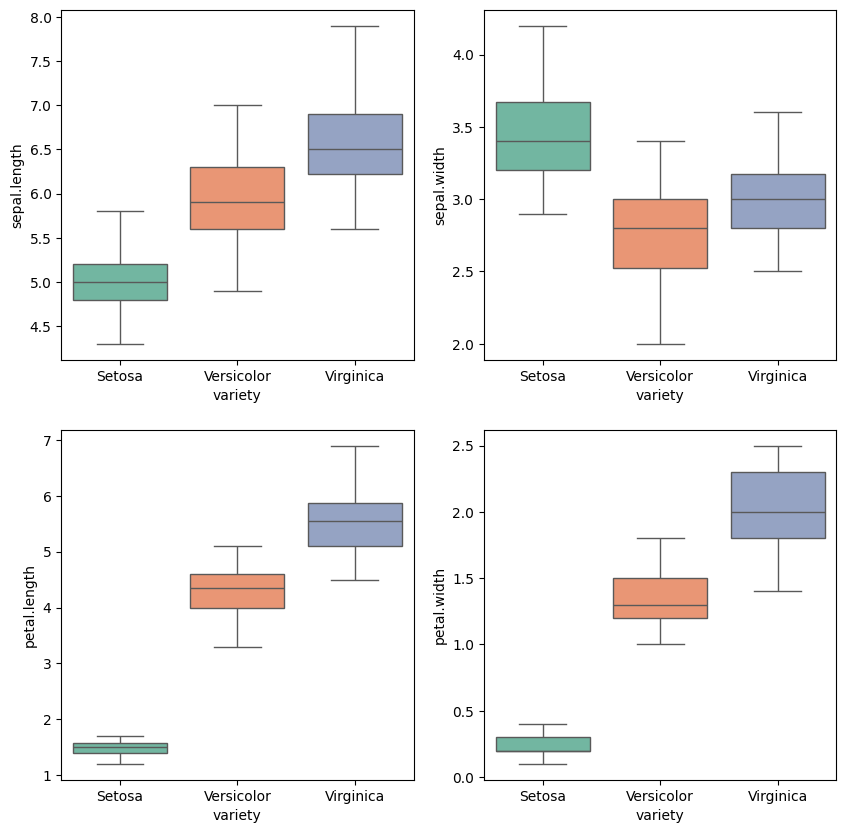

In [5]:
figure, axis = pyplot.subplots(2, 2, figsize=(10, 10))

seaborn.boxplot(iris, x="variety", y="sepal.length", hue="variety", showfliers=False, ax=axis[0, 0], palette="Set2")
seaborn.boxplot(iris, x="variety", y="sepal.width", hue="variety", showfliers=False, ax=axis[0, 1], palette="Set2")
seaborn.boxplot(iris, x="variety", y="petal.length", hue="variety", showfliers=False, ax=axis[1, 0], palette="Set2")
seaborn.boxplot(iris, x="variety", y="petal.width", hue="variety", showfliers=False, ax=axis[1, 1], palette="Set2")

> Se observa una alta separación de la clase *Setosa*, sin embargo, las clases *Versicolor* y *Vigínica* se solapan en todos los ejes, teniendo una mayor separación en el *Petal Length* (ancho de pétalo).

## Fase 2 - Red Neuronal Profunda

In [6]:
X = iris[["petal.length", "petal.width", "sepal.length", "sepal.width"]].values

pandas.DataFrame(X, columns=[f"x{j + 1}" for j in range(X.shape[1])]).head()

,x1,x2,x3,x4
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [7]:
y = iris[["setosa", "versicolor", "virginica"]].values

pandas.DataFrame(y, columns=[f"y{d + 1}" for d in range(y.shape[1])]).head()

,y1,y2,y3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

Xa, Xb, ya, yb = train_test_split(X, y, test_size=0.2, random_state=123)

pandas.DataFrame({
    "X (train)": Xa.shape, 
    "X (test)": Xb.shape, 
    "y (train)": ya.shape, 
    "y (test)": yb.shape
}, index=["Muestras", "Dimensión"]).T

,Muestras,Dimensión
X (train),120,4
X (test),30,4
y (train),120,3
y (test),30,3


In [9]:
model = keras.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(3, activation="softmax"),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
model.fit(Xa, ya, batch_size=20, epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3002 - loss: 1.1633  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2874 - loss: 1.0080 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4248 - loss: 0.9495 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6173 - loss: 0.9205 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5171 - loss: 0.9464
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - loss: 0.8779 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6099 - loss: 0.8709 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.8692 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6036 - loss: 0.8878 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6282 - loss: 0.8457
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - loss: 0.8326 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss

In [12]:
model.evaluate(Xb, yb)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8000 - loss: 0.4517


[0.4517309367656708, 0.800000011920929]

> Observamos un aprendizaje real del $80\%$

In [13]:
model.save("iris-4i3o.keras")

In [14]:
reporte1 = pandas.DataFrame(model.predict(X), columns=["setosa (p)", "versicolor (p)", "virginica (p)"]).round(1).join(iris[["setosa", "versicolor", "virginica"]])

reporte1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,setosa (p),versicolor (p),virginica (p),setosa,versicolor,virginica
0,1.0,0.0,0.0,1,0,0
1,1.0,0.0,0.0,1,0,0
2,1.0,0.0,0.0,1,0,0
3,1.0,0.0,0.0,1,0,0
4,1.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...
145,0.1,0.5,0.3,0,0,1
146,0.1,0.4,0.4,0,0,1
147,0.1,0.5,0.3,0,0,1
148,0.1,0.4,0.4,0,0,1


In [15]:
reporte2 = reporte1[["setosa", "setosa (p)", "virginica", "virginica (p)", "versicolor", "versicolor (p)"]]
reporte2

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
0,1,1.0,0,0.0,0,0.0
1,1,1.0,0,0.0,0,0.0
2,1,1.0,0,0.0,0,0.0
3,1,1.0,0,0.0,0,0.0
4,1,1.0,0,0.0,0,0.0
...,...,...,...,...,...,...
145,0,0.1,1,0.3,0,0.5
146,0,0.1,1,0.4,0,0.4
147,0,0.1,1,0.3,0,0.5
148,0,0.1,1,0.4,0,0.4


In [16]:
reporte2.sample(20)

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
96,0,0.1,0,0.1,1,0.7
126,0,0.1,1,0.3,0,0.6
77,0,0.2,0,0.2,1,0.6
23,1,1.0,0,0.0,0,0.0
15,1,1.0,0,0.0,0,0.0
144,0,0.1,1,0.5,0,0.4
136,0,0.1,1,0.5,0,0.4
105,0,0.1,1,0.5,0,0.4
43,1,1.0,0,0.0,0,0.0
64,0,0.1,0,0.1,1,0.8


In [17]:
reporte3 = (reporte2 >= 0.5).astype(int)
reporte3

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,1,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
145,0,0,1,0,0,1
146,0,0,1,0,0,0
147,0,0,1,0,0,1
148,0,0,1,0,0,0


In [18]:
reporte3.sample(20)

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
95,0,0,0,0,1,1
101,0,0,1,1,0,0
57,0,0,0,0,1,1
143,0,0,1,1,0,0
119,0,0,1,1,0,0
59,0,0,0,0,1,1
28,1,1,0,0,0,0
29,1,1,0,0,0,0
88,0,0,0,0,1,1
117,0,0,1,1,0,0


Text(0.5, 1.0, 'Distribución del error\n(log-loss)')

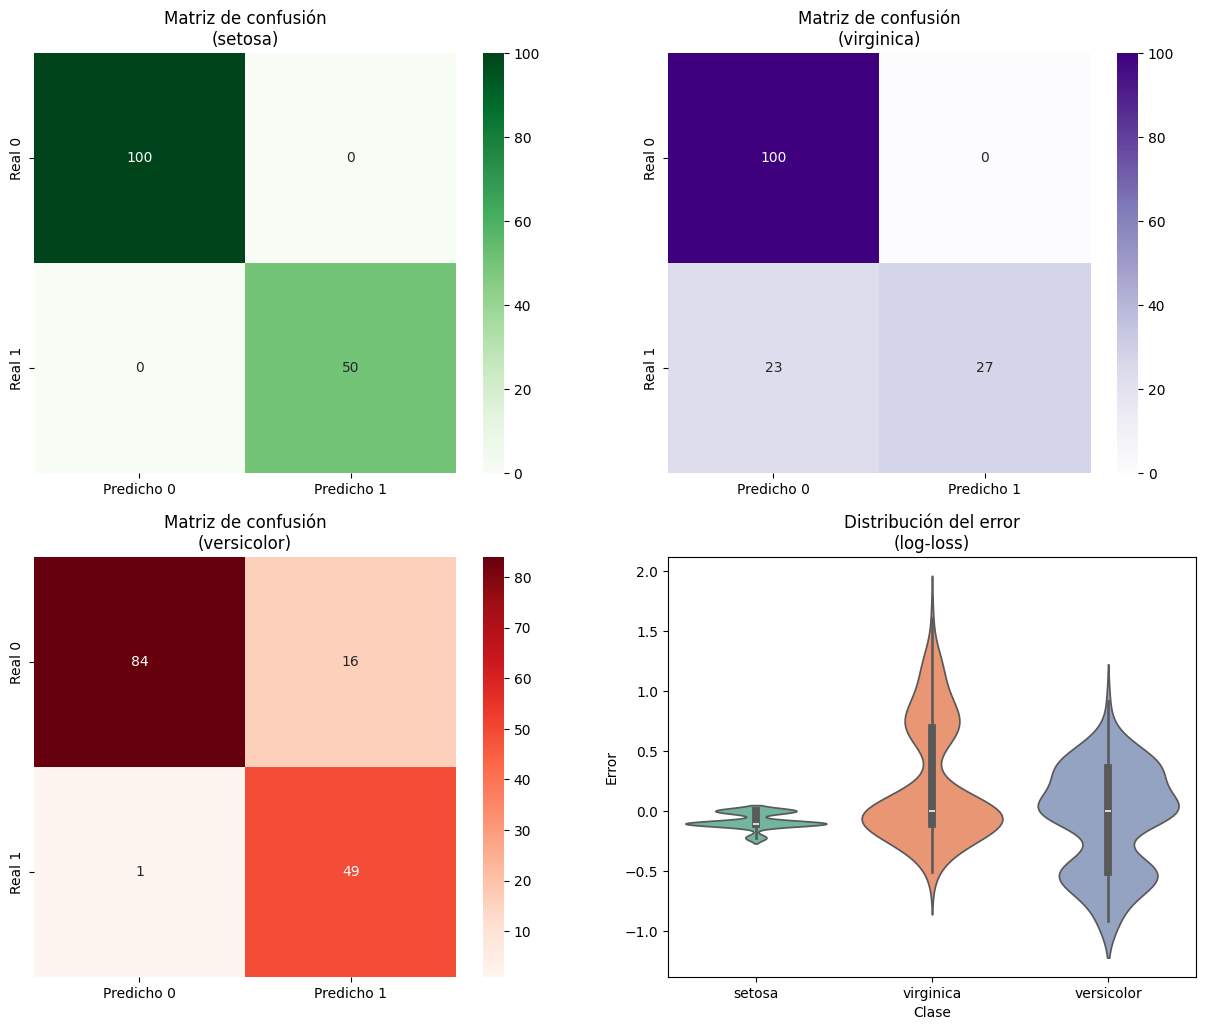

In [19]:
from sklearn.metrics import (
    confusion_matrix, 
    log_loss
)

figure, axis = pyplot.subplots(2, 2, figsize=(15, 12))

cmaps = ["Greens", "Purples", "Reds"]

errors = numpy.zeros((150, 3))

for i, clase in enumerate(["setosa", "virginica", "versicolor"]):

    y_true = reporte3[f"{clase}"]
    y_pred = reporte3[f"{clase} (p)"]
    y_proba = reporte2[f"{clase} (p)"]

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    matrix = pandas.DataFrame([
        [tn, fp],
        [fn, tp]
    ], columns=["Predicho 0", "Predicho 1"], index=["Real 0", "Real 1"])

    # print(f"\nMatriz de confusión para clase {clase}:\n")
    # print(matrix)
    seaborn.heatmap(matrix, ax=axis[int(i / 2), i % 2], annot=True, cmap=cmaps[i], fmt=".0f")
    axis[int(i / 2), i % 2].set_title(f"Matriz de confusión\n({clase})")

    epsilon = 1e-6  # pequeño valor para evitar log(0)
    y_proba = numpy.clip(y_proba, epsilon, 1 - epsilon)
    errors[:, i] = - (y_true * numpy.log(y_proba)) + (1 - y_true) * numpy.log(1 - y_proba)

# axis[1, 1].set_visible(False)
# seaborn.boxplot(iris, x="variety", y=errors, hue="variety", showfliers=False, ax=axis[1, 1], palette="Set2")
# pandas.DataFrame(errors, columns=["setosa", "virginica", "versicolor"]).plot.box(ax=axis[1, 1])

log_errors = pandas.DataFrame(errors, columns=["setosa", "virginica", "versicolor"])
log_errors["id"] = log_errors.index  # agregar id
log_errors_long = log_errors.melt(id_vars="id", var_name="Clase", value_name="Error")

seaborn.violinplot(
    data=log_errors_long,
    x="Clase",
    y="Error",
    hue="Clase",
    palette="Set2",
    ax=axis[1, 1]
)
axis[1, 1].set_title("Distribución del error\n(log-loss)")

## Fase 3 - Red Neuronal Profunda (Estadísticamente informada)

In [20]:
iris2 = iris.copy()

iris2["s1"] = (iris2["sepal.length"] - iris2["sepal.length"].mean()) / iris2["sepal.length"].std()
iris2["s2"] = (iris2["sepal.width"] - iris2["sepal.width"].mean()) / iris2["sepal.width"].std()

iris2["p1"] = (iris2["petal.length"] - iris2["petal.length"].mean()) / iris2["petal.length"].std()
iris2["p2"] = (iris2["petal.width"] - iris2["petal.width"].mean()) / iris2["petal.width"].std()

iris2[["s1", "s2", "p1", "p2"]]

,s1,s2,p1,p2
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


<Axes: xlabel='variety', ylabel='p2'>

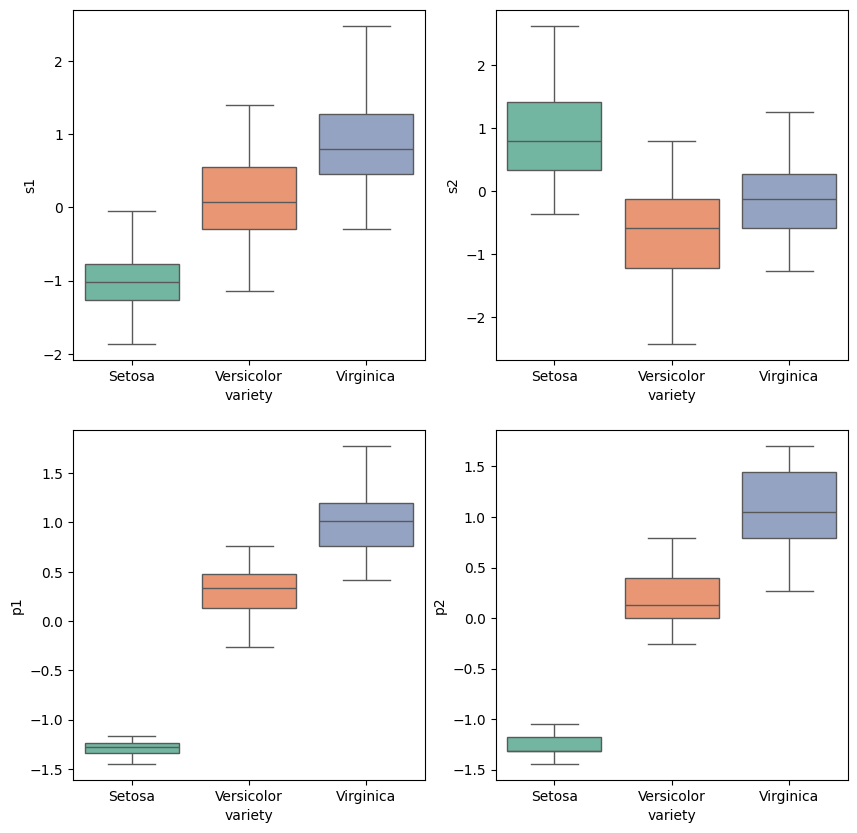

In [21]:
figure, axis = pyplot.subplots(2, 2, figsize=(10, 10))

seaborn.boxplot(iris2, x="variety", y="s1", hue="variety", showfliers=False, ax=axis[0, 0], palette="Set2")
seaborn.boxplot(iris2, x="variety", y="s2", hue="variety", showfliers=False, ax=axis[0, 1], palette="Set2")
seaborn.boxplot(iris2, x="variety", y="p1", hue="variety", showfliers=False, ax=axis[1, 0], palette="Set2")
seaborn.boxplot(iris2, x="variety", y="p2", hue="variety", showfliers=False, ax=axis[1, 1], palette="Set2")

<Axes: xlabel='variety', ylabel='x4'>

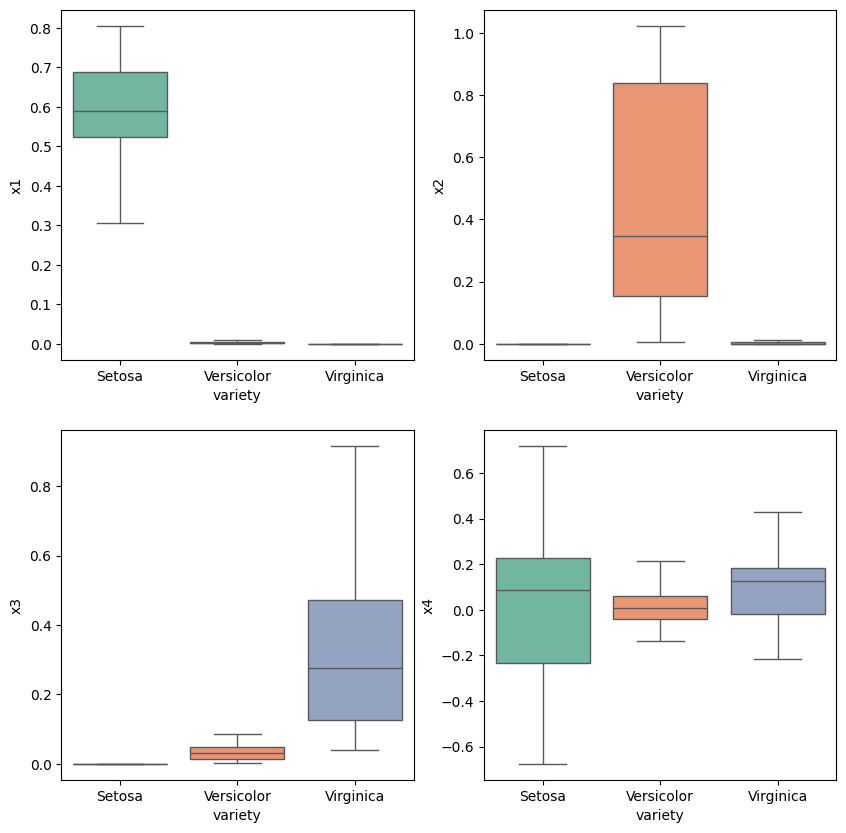

In [22]:
iris2["x1"] = ((-iris2["p1"] + 3) ** 2 / 20) ** 6
iris2["x2"] = ((((-iris2["p1"] ** 2 + 3) ** 2 / 8) ** 6) / 2) ** 2
iris2["x3"] = ((iris2["p1"] + 3) ** 2 / 20) ** 6
iris2["x4"] = (iris2["p1"] + iris2["p2"]) / (0.1 + iris2["s1"] + iris2["s2"]) / 12

figure, axis = pyplot.subplots(2, 2, figsize=(10, 10))

seaborn.boxplot(iris2, x="variety", y="x1", hue="variety", showfliers=False, ax=axis[0, 0], palette="Set2")
seaborn.boxplot(iris2, x="variety", y="x2", hue="variety", showfliers=False, ax=axis[0, 1], palette="Set2")
seaborn.boxplot(iris2, x="variety", y="x3", hue="variety", showfliers=False, ax=axis[1, 0], palette="Set2")
seaborn.boxplot(iris2, x="variety", y="x4", hue="variety", showfliers=False, ax=axis[1, 1], palette="Set2")

In [23]:
X = iris2[["petal.length", "petal.width", "sepal.length", "sepal.width", "x1", "x2", "x3", "x4"]].values

pandas.DataFrame(X, columns=[f"x{j + 1}" for j in range(X.shape[1])]).head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,1.4,0.2,5.1,3.5,0.689593,3.956157e-10,0.000007,-1.012109
1,1.4,0.2,4.9,3.0,0.689593,3.956157e-10,0.000007,0.188400
2,1.3,0.2,4.7,3.2,0.805827,1.514370e-11,0.000005,0.236297
3,1.5,0.2,4.6,3.1,0.588917,6.245790e-09,0.000011,0.165577
4,1.4,0.2,5.0,3.6,0.689593,3.956157e-10,0.000007,-0.675357


In [24]:
y = iris[["setosa", "versicolor", "virginica"]].values

pandas.DataFrame(y, columns=[f"y{d + 1}" for d in range(y.shape[1])]).head()

,y1,y2,y3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
from sklearn.model_selection import train_test_split

Xa, Xb, ya, yb = train_test_split(X, y, test_size=0.2, random_state=123)

pandas.DataFrame({
    "X (train)": Xa.shape, 
    "X (test)": Xb.shape, 
    "y (train)": ya.shape, 
    "y (test)": yb.shape
}, index=["Muestras", "Dimensión"]).T

,Muestras,Dimensión
X (train),120,8
X (test),30,8
y (train),120,3
y (test),30,3


In [26]:
model = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(3, activation="softmax"),
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579 (2.26 KB)

 Trainable params: 579 (2.26 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [28]:
model.fit(Xa, ya, batch_size=20, epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3495 - loss: 1.1525  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 1.0894 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 1.0299 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4015 - loss: 0.9965 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4112 - loss: 0.9652 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3736 - loss: 0.9643 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4643 - loss: 0.9466 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.9168 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.8991 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7245 - loss: 0.8778 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8798 - loss: 0.8539 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - lo

In [29]:
model.evaluate(Xb, yb)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9667 - loss: 0.1464


[0.1463921070098877, 0.9666666388511658]

> Observamos un aprendizaje real del $97\%$

In [30]:
model.save("iris2-4i3o.keras")

In [31]:
reporte1 = pandas.DataFrame(model.predict(X), columns=["setosa (p)", "versicolor (p)", "virginica (p)"]).round(1).join(iris[["setosa", "versicolor", "virginica"]])

reporte1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,setosa (p),versicolor (p),virginica (p),setosa,versicolor,virginica
0,1.0,0.0,0.0,1,0,0
1,1.0,0.0,0.0,1,0,0
2,1.0,0.0,0.0,1,0,0
3,1.0,0.0,0.0,1,0,0
4,1.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...
145,0.0,0.2,0.8,0,0,1
146,0.0,0.1,0.9,0,0,1
147,0.0,0.2,0.8,0,0,1
148,0.0,0.1,0.9,0,0,1


In [32]:
reporte2 = reporte1[["setosa", "setosa (p)", "virginica", "virginica (p)", "versicolor", "versicolor (p)"]]
reporte2

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
0,1,1.0,0,0.0,0,0.0
1,1,1.0,0,0.0,0,0.0
2,1,1.0,0,0.0,0,0.0
3,1,1.0,0,0.0,0,0.0
4,1,1.0,0,0.0,0,0.0
...,...,...,...,...,...,...
145,0,0.0,1,0.8,0,0.2
146,0,0.0,1,0.9,0,0.1
147,0,0.0,1,0.8,0,0.2
148,0,0.0,1,0.9,0,0.1


In [33]:
reporte2.sample(20)

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
144,0,0.0,1,1.0,0,0.0
83,0,0.0,0,0.9,1,0.1
22,1,1.0,0,0.0,0,0.0
19,1,1.0,0,0.0,0,0.0
39,1,0.9,0,0.0,0,0.1
27,1,1.0,0,0.0,0,0.0
102,0,0.0,1,1.0,0,0.0
85,0,0.0,0,0.1,1,0.9
54,0,0.0,0,0.1,1,0.9
104,0,0.0,1,1.0,0,0.0


In [34]:
reporte3 = (reporte2 >= 0.5).astype(int)
reporte3

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,1,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
145,0,0,1,1,0,0
146,0,0,1,1,0,0
147,0,0,1,1,0,0
148,0,0,1,1,0,0


In [35]:
reporte3.sample(20)

,setosa,setosa (p),virginica,virginica (p),versicolor,versicolor (p)
39,1,1,0,0,0,0
146,0,0,1,1,0,0
72,0,0,0,1,1,0
100,0,0,1,1,0,0
83,0,0,0,1,1,0
124,0,0,1,1,0,0
51,0,0,0,0,1,1
149,0,0,1,1,0,0
121,0,0,1,1,0,0
75,0,0,0,0,1,1


Text(0.5, 1.0, 'Distribución del error\n(log-loss)')

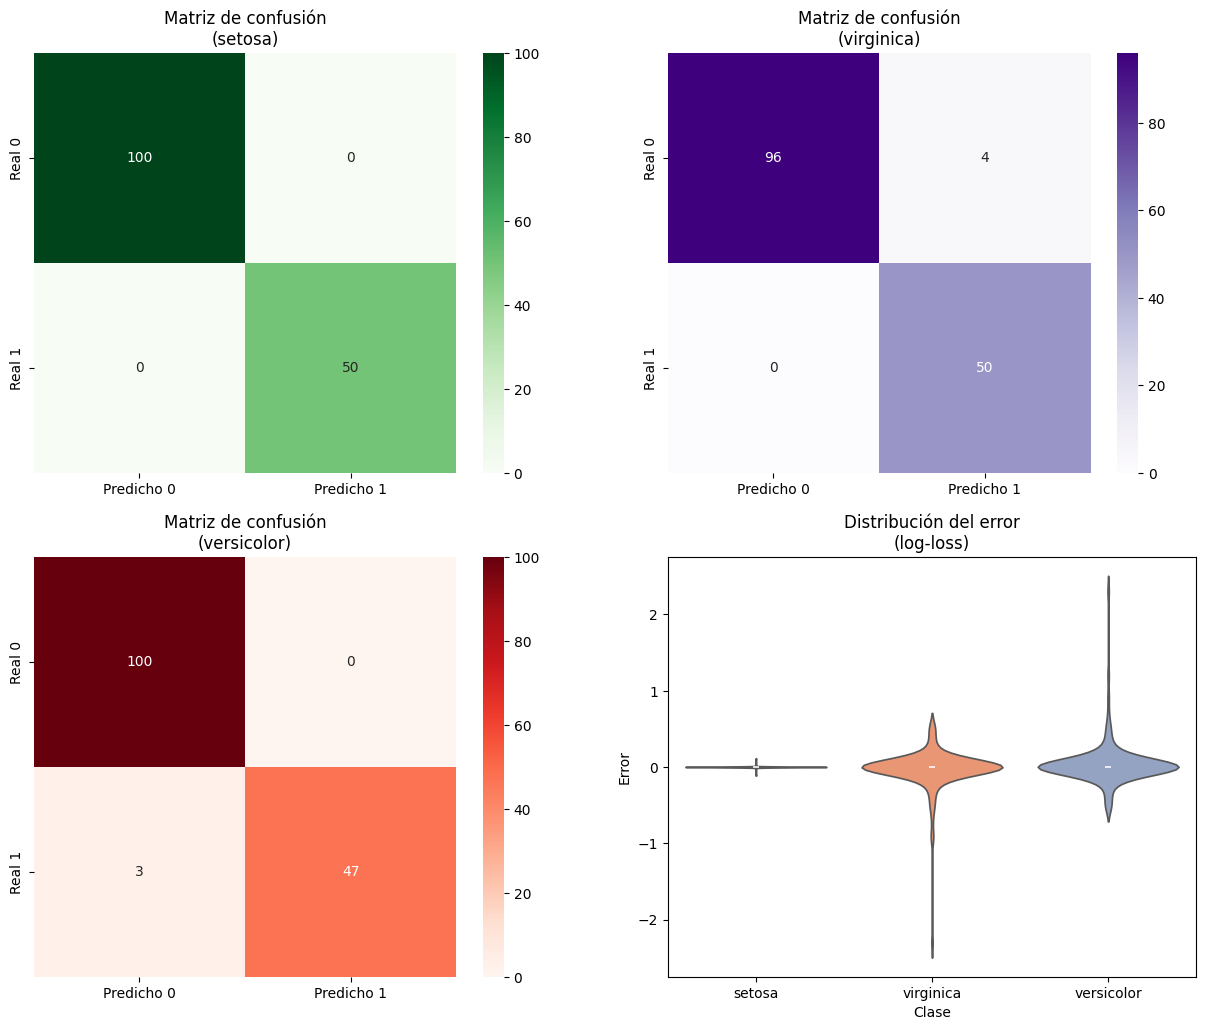

In [36]:
from sklearn.metrics import (
    confusion_matrix, 
    log_loss
)

figure, axis = pyplot.subplots(2, 2, figsize=(15, 12))

cmaps = ["Greens", "Purples", "Reds"]

errors = numpy.zeros((150, 3))

for i, clase in enumerate(["setosa", "virginica", "versicolor"]):

    y_true = reporte3[f"{clase}"]
    y_pred = reporte3[f"{clase} (p)"]
    y_proba = reporte2[f"{clase} (p)"]

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    matrix = pandas.DataFrame([
        [tn, fp],
        [fn, tp]
    ], columns=["Predicho 0", "Predicho 1"], index=["Real 0", "Real 1"])

    # print(f"\nMatriz de confusión para clase {clase}:\n")
    # print(matrix)
    seaborn.heatmap(matrix, ax=axis[int(i / 2), i % 2], annot=True, cmap=cmaps[i], fmt=".0f")
    axis[int(i / 2), i % 2].set_title(f"Matriz de confusión\n({clase})")

    epsilon = 1e-6  # pequeño valor para evitar log(0)
    y_proba = numpy.clip(y_proba, epsilon, 1 - epsilon)
    errors[:, i] = - (y_true * numpy.log(y_proba)) + (1 - y_true) * numpy.log(1 - y_proba)

# axis[1, 1].set_visible(False)
# seaborn.boxplot(iris, x="variety", y=errors, hue="variety", showfliers=False, ax=axis[1, 1], palette="Set2")
# pandas.DataFrame(errors, columns=["setosa", "virginica", "versicolor"]).plot.box(ax=axis[1, 1])

log_errors = pandas.DataFrame(errors, columns=["setosa", "virginica", "versicolor"])
log_errors["id"] = log_errors.index  # agregar id
log_errors_long = log_errors.melt(id_vars="id", var_name="Clase", value_name="Error")

seaborn.violinplot(
    data=log_errors_long,
    x="Clase",
    y="Error",
    hue="Clase",
    palette="Set2",
    ax=axis[1, 1]
)
axis[1, 1].set_title("Distribución del error\n(log-loss)")